In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generating City list

In [2]:
#defining lists for holding latitude, longitude and cities
lat_lng = []
cities = []

# creating a list of random latitudes and longitudes
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lng = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lat, lng)

#Identifying nearest city for each latitude and longitude
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
        

#perform city count
len(cities)
cities


['wanlaweyn',
 'vaini',
 'saint george',
 'rikitea',
 'acapulco',
 'bluff',
 'weligama',
 'nikolskoye',
 'ewa beach',
 'east london',
 'busselton',
 'cabo san lucas',
 'punta arenas',
 'arraial do cabo',
 'kapaa',
 'korla',
 'bredasdorp',
 'pucallpa',
 'puerto ayora',
 'alofi',
 'villa constitucion',
 'cape town',
 'puerto madryn',
 'kaeo',
 'hermanus',
 'saleaula',
 'atuona',
 'taolanaro',
 'hvolsvollur',
 'batemans bay',
 'belushya guba',
 'mar del plata',
 'lasa',
 'carnarvon',
 'carballo',
 'gat',
 'novita',
 'castro',
 'west plains',
 'luderitz',
 'santa isabel',
 'yichun',
 'portland',
 'ushuaia',
 'oranjemund',
 'jamestown',
 'avarua',
 'puksoozero',
 'mataura',
 'azrow',
 'port alfred',
 'yumen',
 'kurilsk',
 'visnes',
 'mahina',
 'sinnamary',
 'port elizabeth',
 'cayenne',
 'ponta do sol',
 'umzimvubu',
 'kaitangata',
 'leningradskiy',
 'butaritari',
 'caldas de vizela',
 'chokurdakh',
 'provideniya',
 'ardakan',
 'kruisfontein',
 'georgetown',
 'puerto escondido',
 'qaanaaq',

# Perform API calls

. Perform weather check in each city using series of successive API calls

. print the city name as it is being processed

In [3]:

#creating lists for different weather parameters
city_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
windspeed_list =[]
cloudiness_list = []
country_list = []
date_list = []

counter = 0
record_counter = 0
setcount = 1


# weather api url : https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
base_url = "https://api.openweathermap.org/data/2.5/weather?q="
#using for loop to check weather in each city using weather api call
for city in cities:
    counter +=1
    if (counter % 50 == 0):
        setcount += 1
        record_counter = 0
        
    record_counter += 1
    print("Processing Record " + str(record_counter) + " of Set " + str(setcount) + " | " + city)
    
    try:
        url = f"{base_url}{city}&appid={weather_api_key}"
        response = requests.get(url)
        json_response = response.json()
        city_list.append(json_response["name"])
        lat_list.append(json_response["coord"]["lat"])
        lng_list.append(json_response["coord"]["lon"])
        temp_list.append(json_response["main"]["temp"])
        humidity_list.append(json_response["main"]["humidity"])
        windspeed_list.append(json_response["wind"]["speed"])
        cloudiness_list.append(json_response["clouds"]["all"])
        country_list.append(json_response["sys"]["country"])
        date_list.append(json_response["dt"])
        
    except:
        print("City not found. Skipping...")
        
        
    
    


Processing Record 1 of Set 1 | wanlaweyn
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | acapulco
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | weligama
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | ewa beach
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | korla
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | pucallpa
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | alofi
Processing Record 21 of Set 1 | villa constitucion
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 1 | puerto madryn
Processing Record 24 of Set 1 |

Processing Record 35 of Set 4 | marcona
City not found. Skipping...
Processing Record 36 of Set 4 | tilichiki
Processing Record 37 of Set 4 | kirando
Processing Record 38 of Set 4 | mikuni
Processing Record 39 of Set 4 | strezhevoy
Processing Record 40 of Set 4 | cap malheureux
Processing Record 41 of Set 4 | iranshahr
Processing Record 42 of Set 4 | bambous virieux
Processing Record 43 of Set 4 | ahipara
Processing Record 44 of Set 4 | lagoa
Processing Record 45 of Set 4 | comodoro rivadavia
Processing Record 46 of Set 4 | touros
Processing Record 47 of Set 4 | melfort
Processing Record 48 of Set 4 | taian
Processing Record 49 of Set 4 | ogaminana
Processing Record 50 of Set 4 | dingle
Processing Record 1 of Set 5 | jambi
Processing Record 2 of Set 5 | souillac
Processing Record 3 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 5 | vardo
Processing Record 5 of Set 5 | tandil
Processing Record 6 of Set 5 | pacific grove
Processing Record 7 of Set 5 | bada

Processing Record 21 of Set 8 | vanavara
Processing Record 22 of Set 8 | weleri
Processing Record 23 of Set 8 | namatanai
Processing Record 24 of Set 8 | matara
Processing Record 25 of Set 8 | nguiu
City not found. Skipping...
Processing Record 26 of Set 8 | san cristobal
Processing Record 27 of Set 8 | manzanillo
Processing Record 28 of Set 8 | poum
Processing Record 29 of Set 8 | khandbari
Processing Record 30 of Set 8 | saint-pierre
Processing Record 31 of Set 8 | banjar
Processing Record 32 of Set 8 | langxiang
Processing Record 33 of Set 8 | mantsala
Processing Record 34 of Set 8 | aguimes
Processing Record 35 of Set 8 | moussoro
Processing Record 36 of Set 8 | herat
Processing Record 37 of Set 8 | kavaratti
Processing Record 38 of Set 8 | hat yai
Processing Record 39 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 40 of Set 8 | tuatapere
Processing Record 41 of Set 8 | geraldton
Processing Record 42 of Set 8 | rengo
Processing Record 43 of Set 8 | balaipungut
Pro

Processing Record 8 of Set 12 | nuuk
Processing Record 9 of Set 12 | samthar
Processing Record 10 of Set 12 | lata
Processing Record 11 of Set 12 | chervone
Processing Record 12 of Set 12 | havre
Processing Record 13 of Set 12 | dunedin
Processing Record 14 of Set 12 | sisimiut
Processing Record 15 of Set 12 | santana do livramento
Processing Record 16 of Set 12 | laramie
Processing Record 17 of Set 12 | kampene
Processing Record 18 of Set 12 | port arthur
Processing Record 19 of Set 12 | farmington
Processing Record 20 of Set 12 | livadiya
Processing Record 21 of Set 12 | rio gallegos
Processing Record 22 of Set 12 | yongan
Processing Record 23 of Set 12 | hurricane
Processing Record 24 of Set 12 | khash
Processing Record 25 of Set 12 | port macquarie
Processing Record 26 of Set 12 | dese
Processing Record 27 of Set 12 | newport
Processing Record 28 of Set 12 | liverpool
Processing Record 29 of Set 12 | mae sai
Processing Record 30 of Set 12 | vanderhoof
Processing Record 31 of Set 12

# Convert raw data to DataFrame


In [4]:
#define the data into dictionary
dict = {"City":city_list, "country":country_list, "Date": date_list, "Latitude": lat_list, "Longitude": lng_list, 
        "Max_temp":temp_list, "Humidity": humidity_list, "Cloudiness": cloudiness_list, "Wind Speed": windspeed_list}

weather_df = pd.DataFrame(dict)
weather_df.head()

,City,country,Date,Latitude,Longitude,Max_temp,Humidity,Cloudiness,Wind Speed
0,Wanlaweyn,SO,1650082259,2.6185,44.8938,299.93,78,94,1.94
1,Vaini,TO,1650082485,-21.2000,-175.2000,301.24,74,75,3.09
2,Saint George,US,1650082374,37.1041,-113.5841,292.22,25,0,1.54
3,Rikitea,PF,1650082487,-23.1203,-134.9692,298.57,71,1,6.31
4,Acapulco de Juárez,MX,1650082431,16.8634,-99.8901,300.05,74,0,1.54


# Plotting the data


# 1. Latitude vs Temperature plot


Text(0, 0.5, 'Temperature (k)')

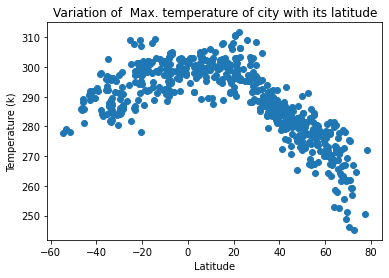

In [7]:
x_values = weather_df["Latitude"]
y_values = weather_df["Max_temp"]
plt.scatter(x_values, y_values)
plt.title("Variation of  Max. temperature of city with its latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (k)")

# 2. Latitude vs Humidity plot

Text(0, 0.5, 'Humidity')

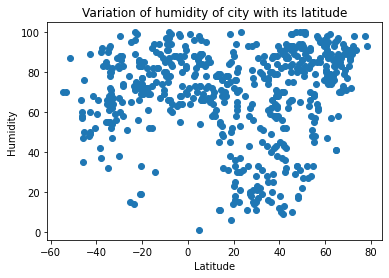

In [8]:
x_values = weather_df["Latitude"]
y_values = weather_df["Humidity"]
plt.scatter(x_values, y_values)
plt.title("Variation of humidity of city with its latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# 3. Latitude vs Cloudiness plot

Text(0, 0.5, 'Cloudiness')

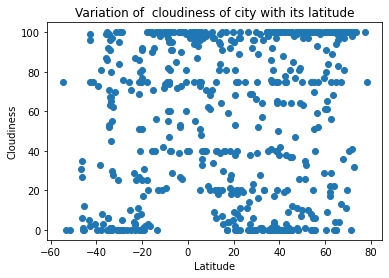

In [9]:
x_values = weather_df["Latitude"]
y_values = weather_df["Cloudiness"]
plt.scatter(x_values, y_values)
plt.title("Variation of  cloudiness of city with its latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# 4. Latitude vs Wind speed plot

Text(0, 0.5, 'Wind speed')

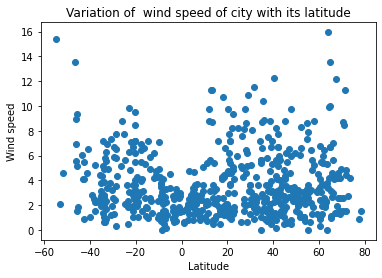

In [10]:
x_values = weather_df["Latitude"]
y_values = weather_df["Wind Speed"]
plt.scatter(x_values, y_values)
plt.title("Variation of  wind speed of city with its latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")

# Calculating linear Regression

# 1. Latitude vs Temperature: Northen hemisphere

Correlation coef (r) = -0.89


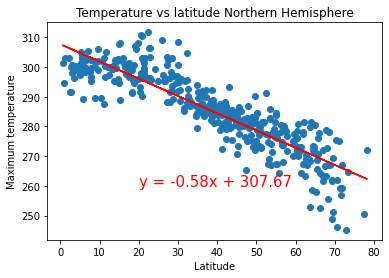

In [28]:
weather_north = pd.DataFrame(weather_df.loc[weather_df["Latitude"]>0])
x_values = weather_north["Latitude"]
y_values = weather_north["Max_temp"]

#calculating correlation
correlation = st.pearsonr(x_values, y_values)
print(f"Correlation coef (r) = {round(correlation[0],2)}")

#calculating Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum temperature')
plt.title("Temperature vs latitude Northern Hemisphere")

plt.show()

# 2. Latitude vs temperature: southern hemisphere

Correlation coef (r) = 0.61


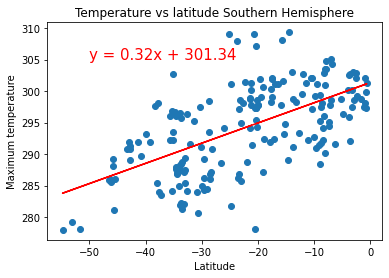

In [31]:
weather_south = pd.DataFrame(weather_df.loc[weather_df["Latitude"]<0])
x_values = weather_south["Latitude"]
y_values = weather_south["Max_temp"]

#calculating correlation
correlation = st.pearsonr(x_values, y_values)
print(f"Correlation coef (r) = {round(correlation[0],2)}")

#calculating Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,305),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum temperature')
plt.title("Temperature vs latitude Southern Hemisphere")
plt.show()

# 3. Latitude vs Humidity: Northen Hemisphere

Correlation coef (r) = 0.23


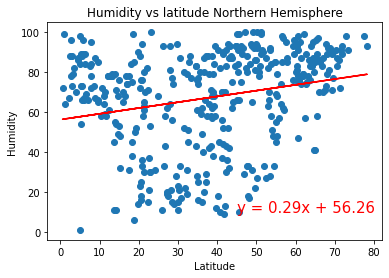

In [35]:
x_values = weather_north["Latitude"]
y_values = weather_north["Humidity"]

#calculating correlation
correlation = st.pearsonr(x_values, y_values)
print(f"Correlation coef (r) = {round(correlation[0],2)}")

#calculating Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs latitude Northern Hemisphere")

plt.show()

# 4. Latitude vs Humidity : Southern Hemisphere

Correlation coef (r) = 0.34


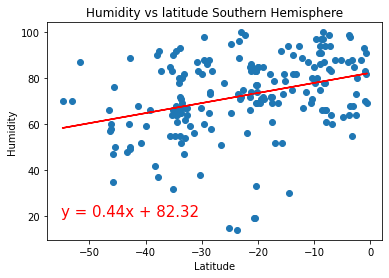

In [36]:
x_values = weather_south["Latitude"]
y_values = weather_south["Humidity"]

#calculating correlation
correlation = st.pearsonr(x_values, y_values)
print(f"Correlation coef (r) = {round(correlation[0],2)}")

#calculating Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs latitude Southern Hemisphere")

plt.show()

# 5. Latitude vs Wind speed: Northen Hemisphere

Correlation coef (r) = 0.09


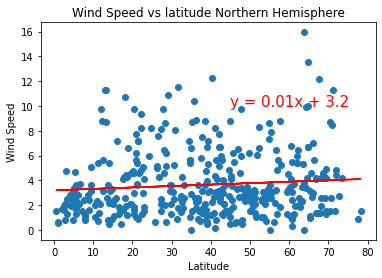

In [37]:
x_values = weather_north["Latitude"]
y_values = weather_north["Wind Speed"]

#calculating correlation
correlation = st.pearsonr(x_values, y_values)
print(f"Correlation coef (r) = {round(correlation[0],2)}")

#calculating Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Wind Speed vs latitude Northern Hemisphere")

plt.show()

# 6. Latitude vs Wind speed : Southern Hemisphere